In [1]:
## Processing: LabelTransfer_Wang_GarciaAlonso_Paper
### Vic-Fabienne 16/01/2022

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.17.4 scipy==1.7.3 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.1 python-igraph==0.9.9 pynndescent==0.5.5


In [4]:
project_dir = '/home/vfs/PycharmProjects/Organoids_sc_WS2122'
# project_dir = '../../Organoids_sc_WS2122'

In [7]:
adata_ref = sc.read_h5ad( os.path.join(project_dir, 'data/ReferenceDB/endometrium_all.h5ad'))
adata_ref.var_names_make_unique()

In [13]:
print(adata_ref.shape)
adata_WIP = adata_ref[adata_ref.obs["SampleID"] == "4861STDY7387182",:]
print(adata_WIP.shape)
adata_small = adata_WIP[0:100,:]
print(adata_small.shape)

(100307, 28614)
(6007, 28614)
(100, 28614)


In [14]:
adata_small.obs


,SampleID,log2p1_count,percent_mito,n_genes,DonorID,BiopsyType,Location,Binary Stage,Stage,Broad cell type,Cell type,CellCycle Phase
4861STDY7387182_AAACCTGAGCCAGTAG,4861STDY7387182,12.635945,0.030484,2046,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
4861STDY7387182_AAACCTGAGCGATAGC,4861STDY7387182,13.906796,0.046881,3644,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
4861STDY7387182_AAACCTGAGGGTGTTG,4861STDY7387182,12.864573,0.072415,2367,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Immune,Lymphoid,G1
4861STDY7387182_AAACCTGCACACTGCG,4861STDY7387182,13.503702,0.046410,3293,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
4861STDY7387182_AAACCTGCAGGTCCAC,4861STDY7387182,13.812679,0.036975,4034,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G2M
...,...,...,...,...,...,...,...,...,...,...,...,...
4861STDY7387182_AACCGCGAGTGATCGG,4861STDY7387182,13.253552,0.042704,2754,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
4861STDY7387182_AACCGCGCACCAGCAC,4861STDY7387182,12.618844,0.017014,2089,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1
4861STDY7387182_AACCGCGCATCCGCGA,4861STDY7387182,13.728026,0.079304,3672,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Endothelial,Endothelial ACKR1,G1
4861STDY7387182_AACCGCGGTATTACCG,4861STDY7387182,12.736612,0.030041,2358,A13,Organ_Donor,endometrium_enriched,Proliferative,proliferative,Stromal,eS,G1


computing PCA
    with n_comps=50
    finished (0:00:20)


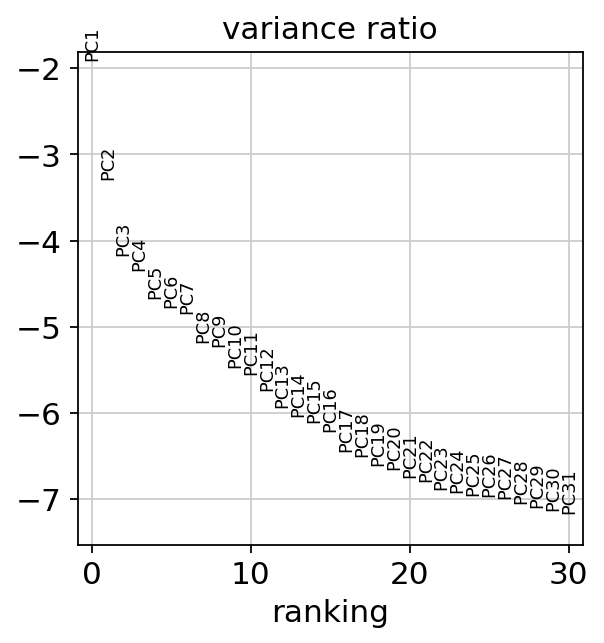

In [22]:
sc.tl.pca(adata_WIP, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_WIP, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


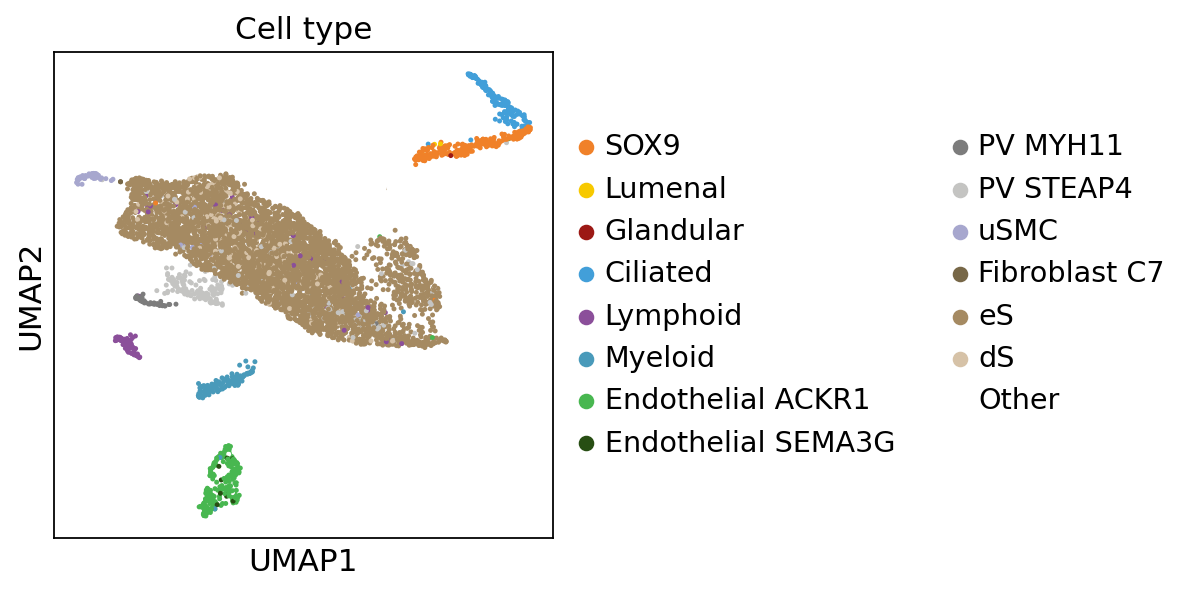

In [23]:
sc.pp.neighbors(adata_WIP, n_pcs=30)
sc.tl.leiden(adata_WIP)
sc.tl.paga(adata_WIP)
sc.pl.paga(adata_WIP, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_WIP, init_pos='paga')
sc.pl.umap(adata_WIP, color='Cell type')


### extracting Wang samples from the object

In [30]:
samples = adata_ref.obs['SampleID']

if any("4861STDY7387182" in s for s in samples):
    print('TRUE')
else:
    print('FALSE')

TRUE


In [48]:
adata_ref.obs["SampleID"].cat.categories

Index(['4861STDY7387181', '4861STDY7387182', '4861STDY7387183',
       '4861STDY7771115', '4861STDY7771123', 'GSM4577306', 'GSM4577307',
       'GSM4577308', 'GSM4577309', 'GSM4577310', 'GSM4577311', 'GSM4577312',
       'GSM4577313', 'GSM4577314', 'GSM4577315', 'MRC_Endo8625698',
       'MRC_Endo8625699', 'MRC_Endo8712024', 'MRC_Endo8712032',
       'MRC_Endo8715415', 'MRC_Endo8715416'],
      dtype='object')

# Processing a secretory Phase sample to show that our pattern is not there

In [8]:
adata_secPhase_s1 = adata_ref[adata_ref.obs["SampleID"] == "MRC_Endo8625698",:]
adata_secPhase_s2 = adata_ref[adata_ref.obs["SampleID"] == "MRC_Endo8625699",:]
print(adata_secPhase_s1.shape)
print(adata_secPhase_s2.shape)

(4310, 28614)
(2368, 28614)


computing PCA
    with n_comps=50
    finished (0:00:39)


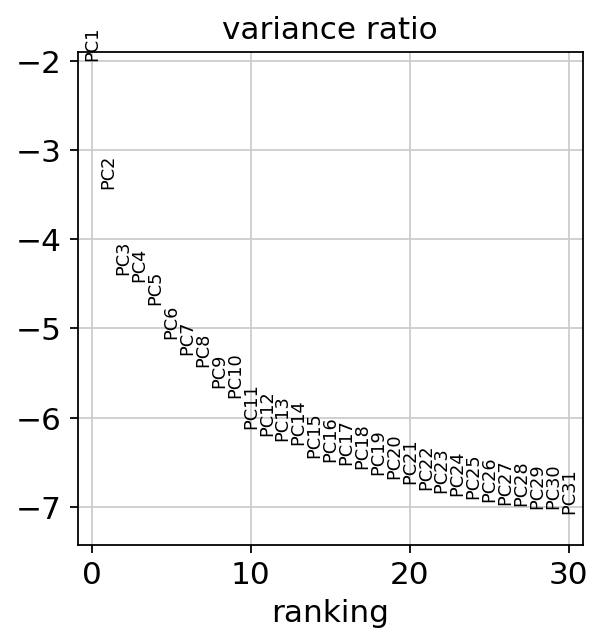

computing PCA
    with n_comps=50
    finished (0:00:14)


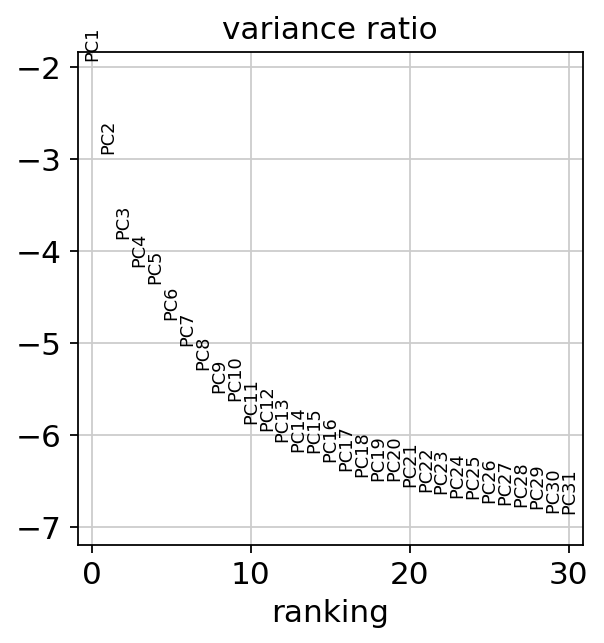

In [9]:
# check which PCA to take

sc.tl.pca(adata_secPhase_s1, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_secPhase_s1, log=True)

sc.tl.pca(adata_secPhase_s2, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_secPhase_s2, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


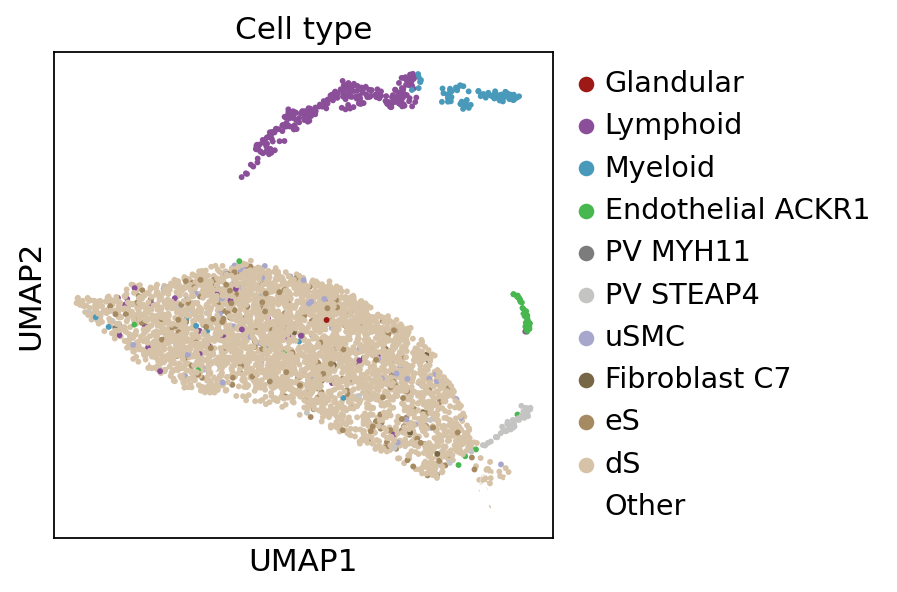

In [12]:
sc.pp.neighbors(adata_secPhase_s1, n_pcs=40)
sc.tl.leiden(adata_secPhase_s1)
sc.tl.paga(adata_secPhase_s1)
sc.pl.paga(adata_secPhase_s1, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_secPhase_s1, init_pos='paga')
sc.pl.umap(adata_secPhase_s1, color='Cell type')

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


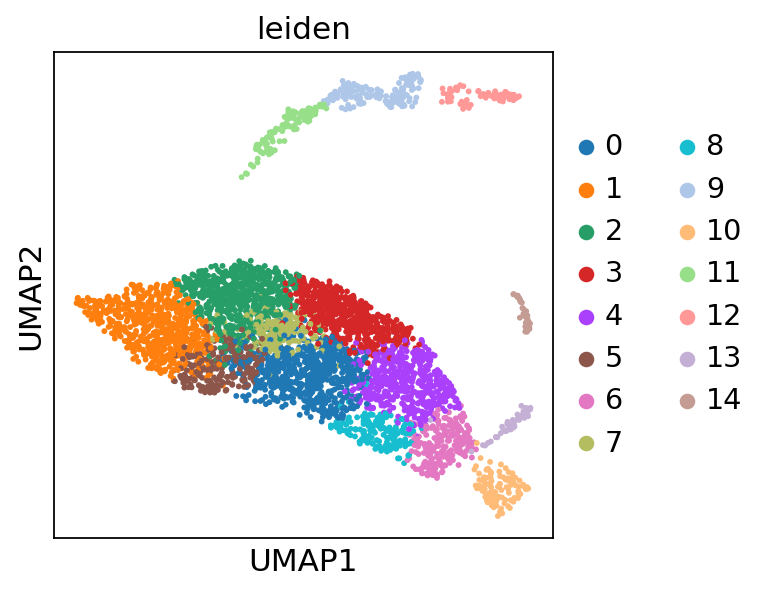

In [13]:
sc.pp.neighbors(adata_secPhase_s1, n_pcs=40)
sc.tl.leiden(adata_secPhase_s1)
sc.tl.paga(adata_secPhase_s1)
sc.pl.paga(adata_secPhase_s1, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_secPhase_s1, init_pos='paga')
sc.pl.umap(adata_secPhase_s1, color='leiden')

(850, 28614)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


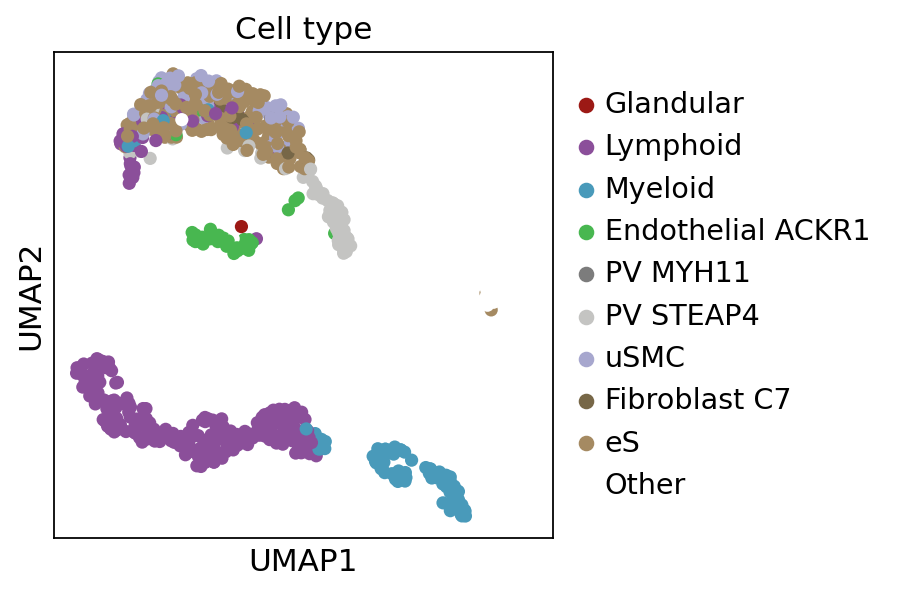

In [17]:
adata_secPhase_s1_nodS = adata_secPhase_s1[adata_secPhase_s1.obs["Cell type"] != "dS",:]
print(adata_secPhase_s1_nodS.shape)

sc.pp.neighbors(adata_secPhase_s1_nodS, n_pcs=30)
sc.tl.leiden(adata_secPhase_s1_nodS)
sc.tl.paga(adata_secPhase_s1_nodS)
sc.pl.paga(adata_secPhase_s1_nodS, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_secPhase_s1_nodS, init_pos='paga')
sc.pl.umap(adata_secPhase_s1_nodS, color='Cell type')

(665, 28614)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


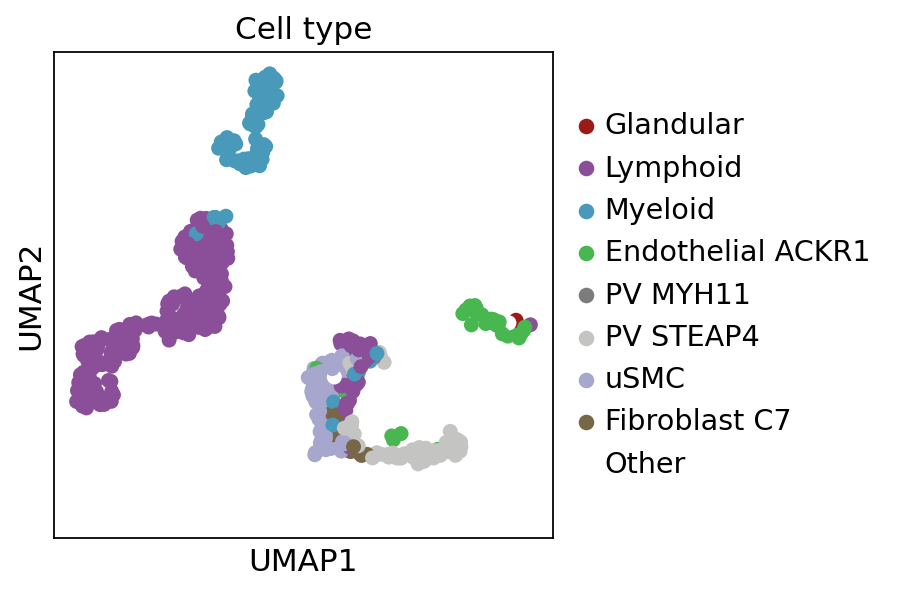

In [18]:
adata_secPhase_s1_nodS_noeS = adata_secPhase_s1_nodS[adata_secPhase_s1_nodS.obs["Cell type"] != "eS",:]
print(adata_secPhase_s1_nodS_noeS.shape)

sc.pp.neighbors(adata_secPhase_s1_nodS_noeS, n_pcs=30)
sc.tl.leiden(adata_secPhase_s1_nodS_noeS)
sc.tl.paga(adata_secPhase_s1_nodS_noeS)
sc.pl.paga(adata_secPhase_s1_nodS_noeS, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_secPhase_s1_nodS_noeS, init_pos='paga')
sc.pl.umap(adata_secPhase_s1_nodS_noeS, color='Cell type')

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


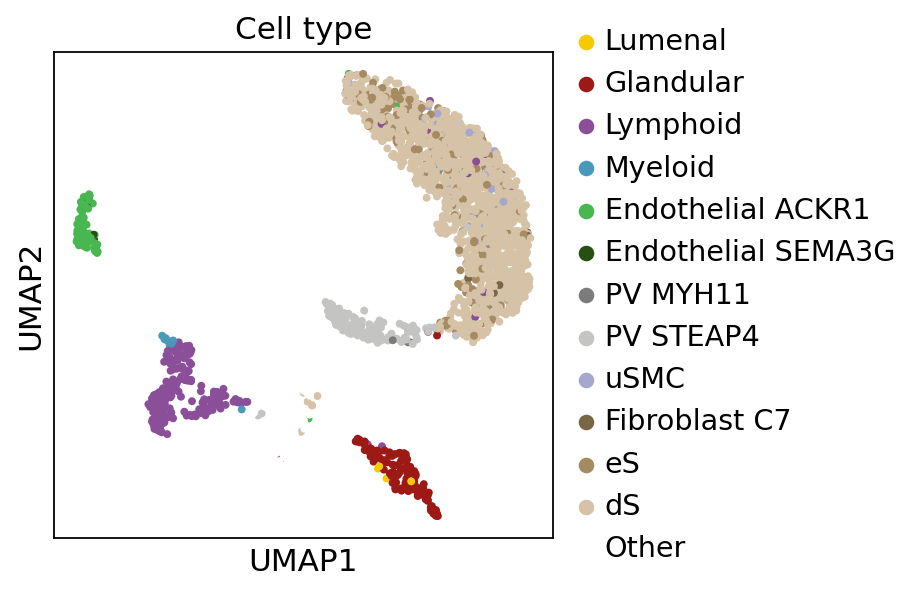

In [11]:
sc.pp.neighbors(adata_secPhase_s2, n_pcs=30)
sc.tl.leiden(adata_secPhase_s2)
sc.tl.paga(adata_secPhase_s2)
sc.pl.paga(adata_secPhase_s2, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_secPhase_s2, init_pos='paga')
sc.pl.umap(adata_secPhase_s2, color='Cell type')

## Finding marker genes

ranking genes


/home/vfs/PycharmProjects/Organoids_sc_WS2122/PySc/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished (0:00:18)


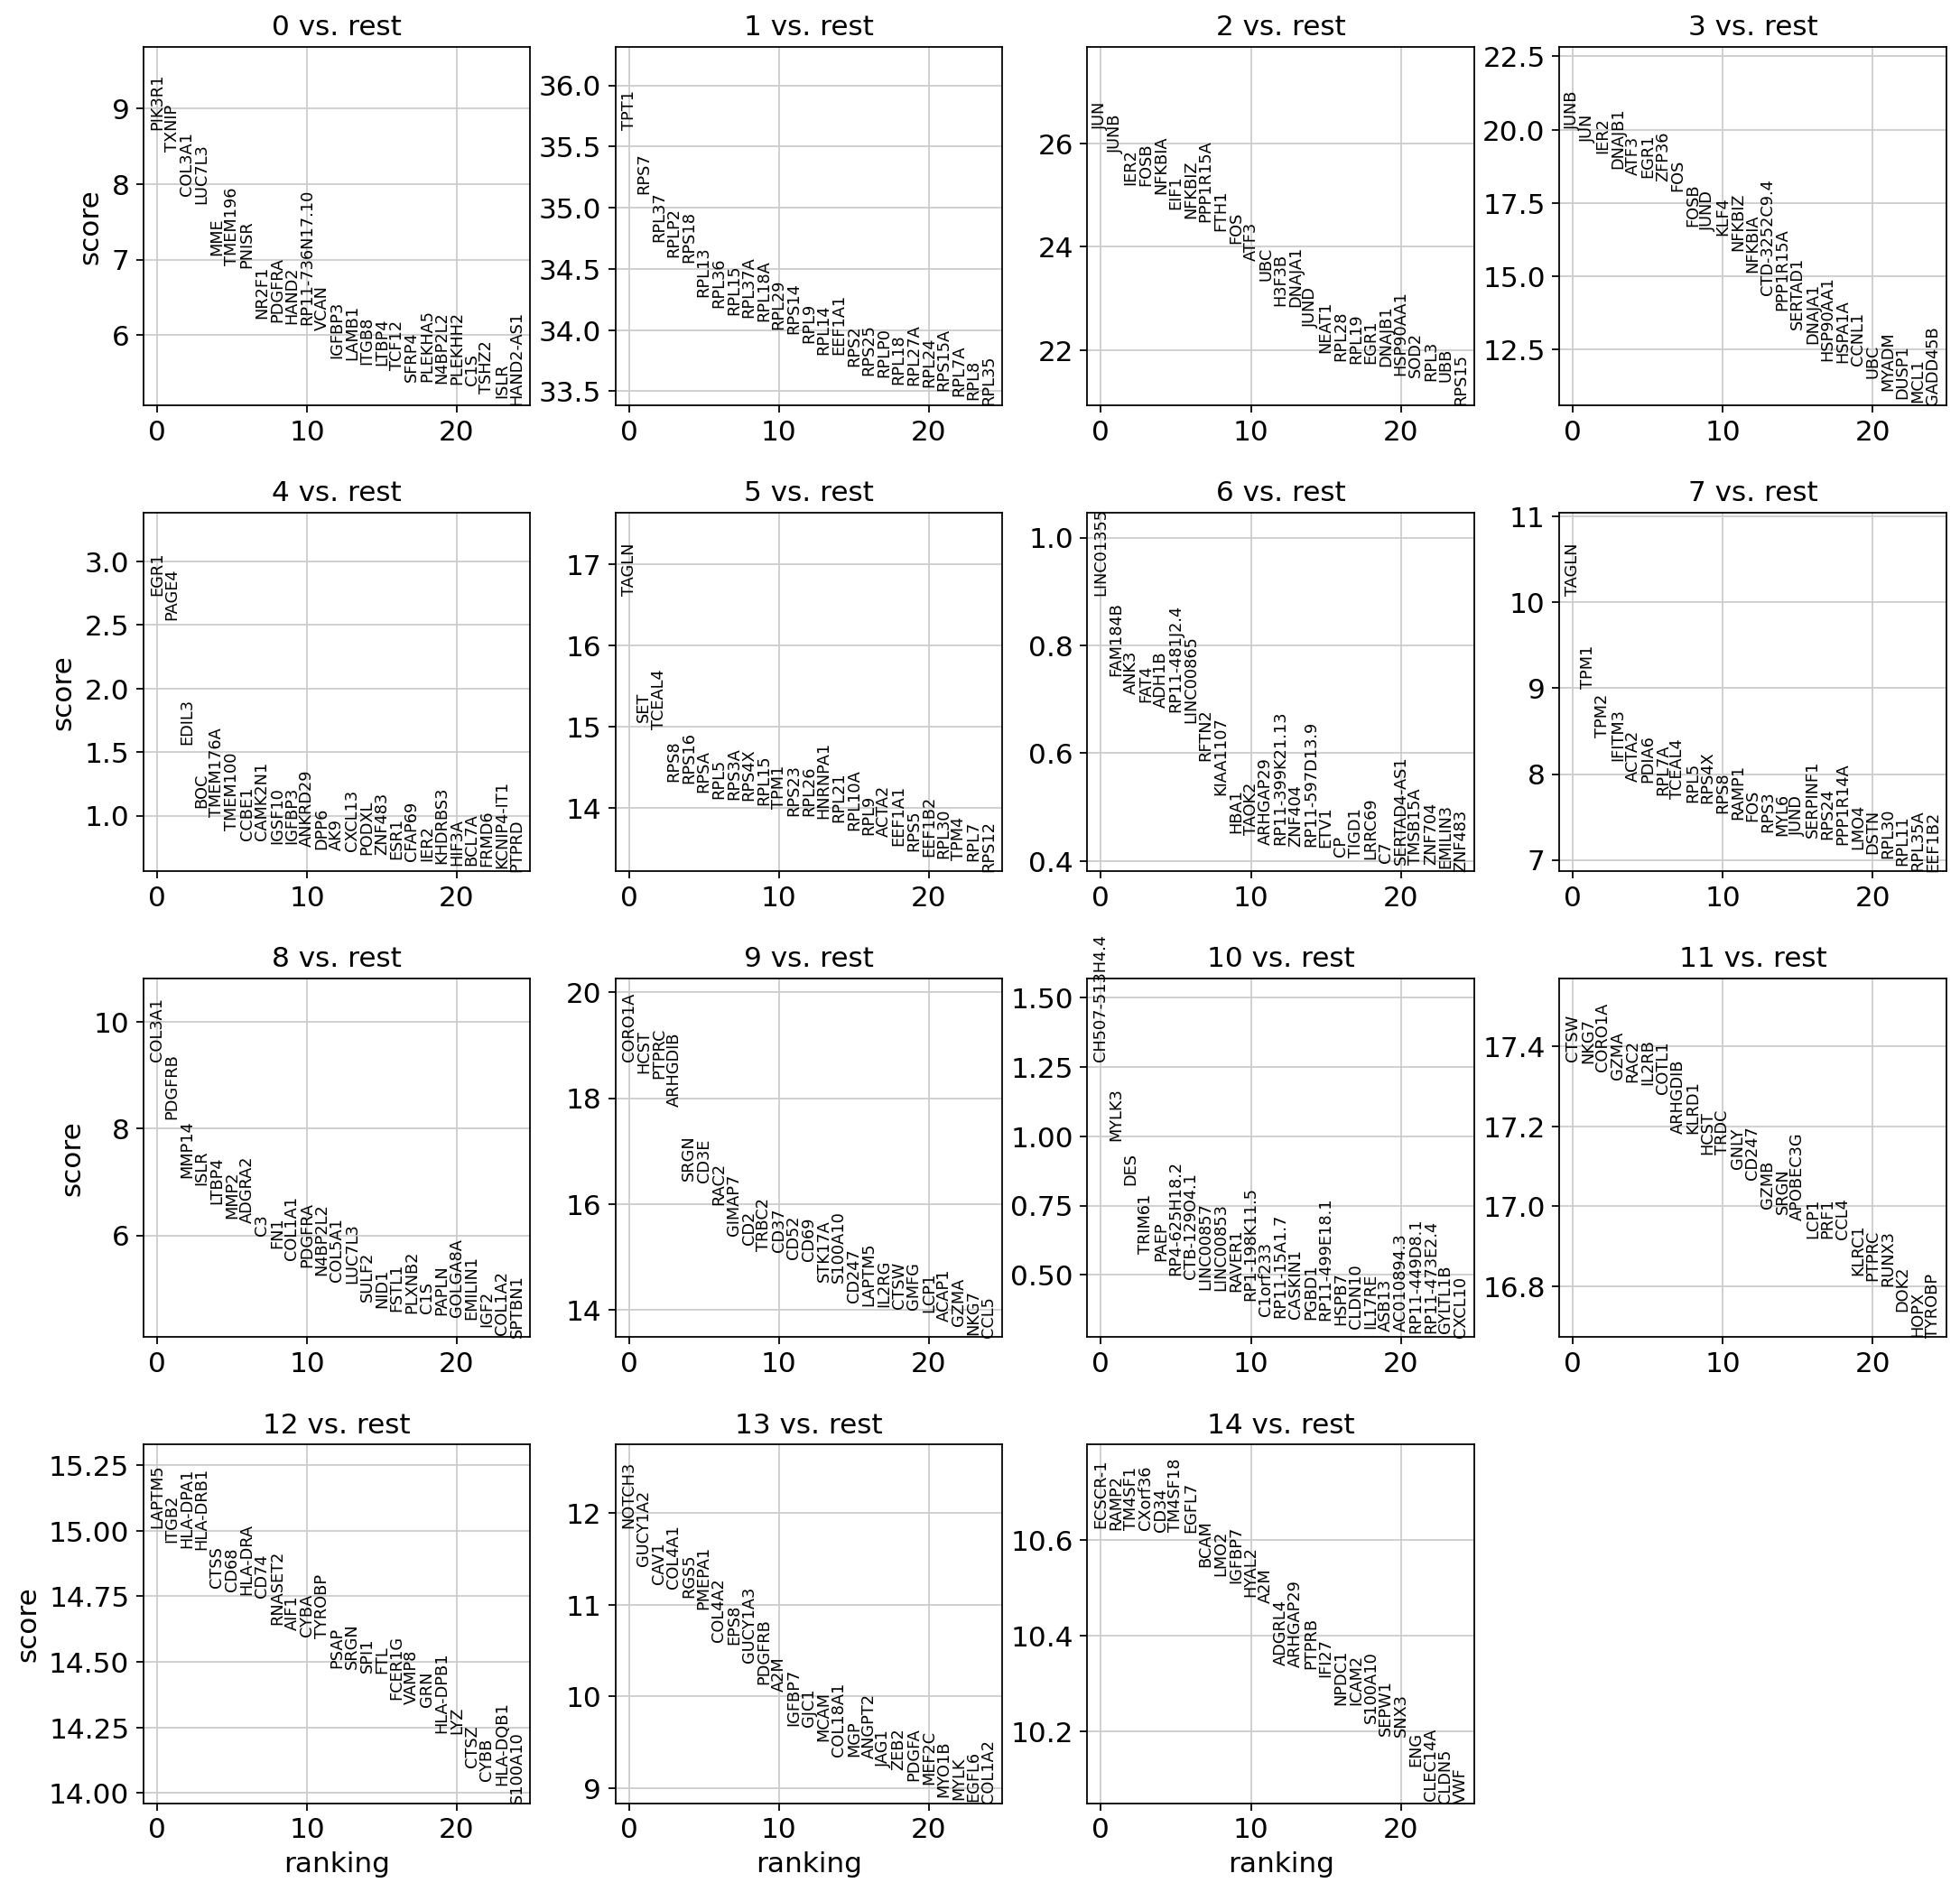

In [20]:
sc.pp.log1p(adata_secPhase_s1)

#result of a Wilcoxon rank-sum test:
sc.tl.rank_genes_groups(adata_secPhase_s1, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_secPhase_s1, n_genes=25, sharey=False) #ln36

In [21]:
pd.DataFrame(adata_secPhase_s1.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,PIK3R1,TPT1,JUN,JUNB,EGR1,TAGLN,LINC01355,TAGLN,COL3A1,CORO1A,CH507-513H4.4,CTSW,LAPTM5,NOTCH3,ECSCR-1
1,TXNIP,RPS7,JUNB,JUN,PAGE4,SET,FAM184B,TPM1,PDGFRB,HCST,MYLK3,NKG7,ITGB2,GUCY1A2,RAMP2
2,COL3A1,RPL37,IER2,IER2,EDIL3,TCEAL4,ANK3,TPM2,MMP14,PTPRC,DES,CORO1A,HLA-DPA1,CAV1,TM4SF1
3,LUC7L3,RPLP2,FOSB,DNAJB1,BOC,RPS8,FAT4,IFITM3,ISLR,ARHGDIB,TRIM61,GZMA,HLA-DRB1,COL4A1,CXorf36
4,MME,RPS18,NFKBIA,ATF3,TMEM176A,RPS16,ADH1B,ACTA2,LTBP4,SRGN,PAEP,RAC2,CTSS,RGS5,CD34


ranking genes


/home/vfs/PycharmProjects/Organoids_sc_WS2122/PySc/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished (0:00:08)


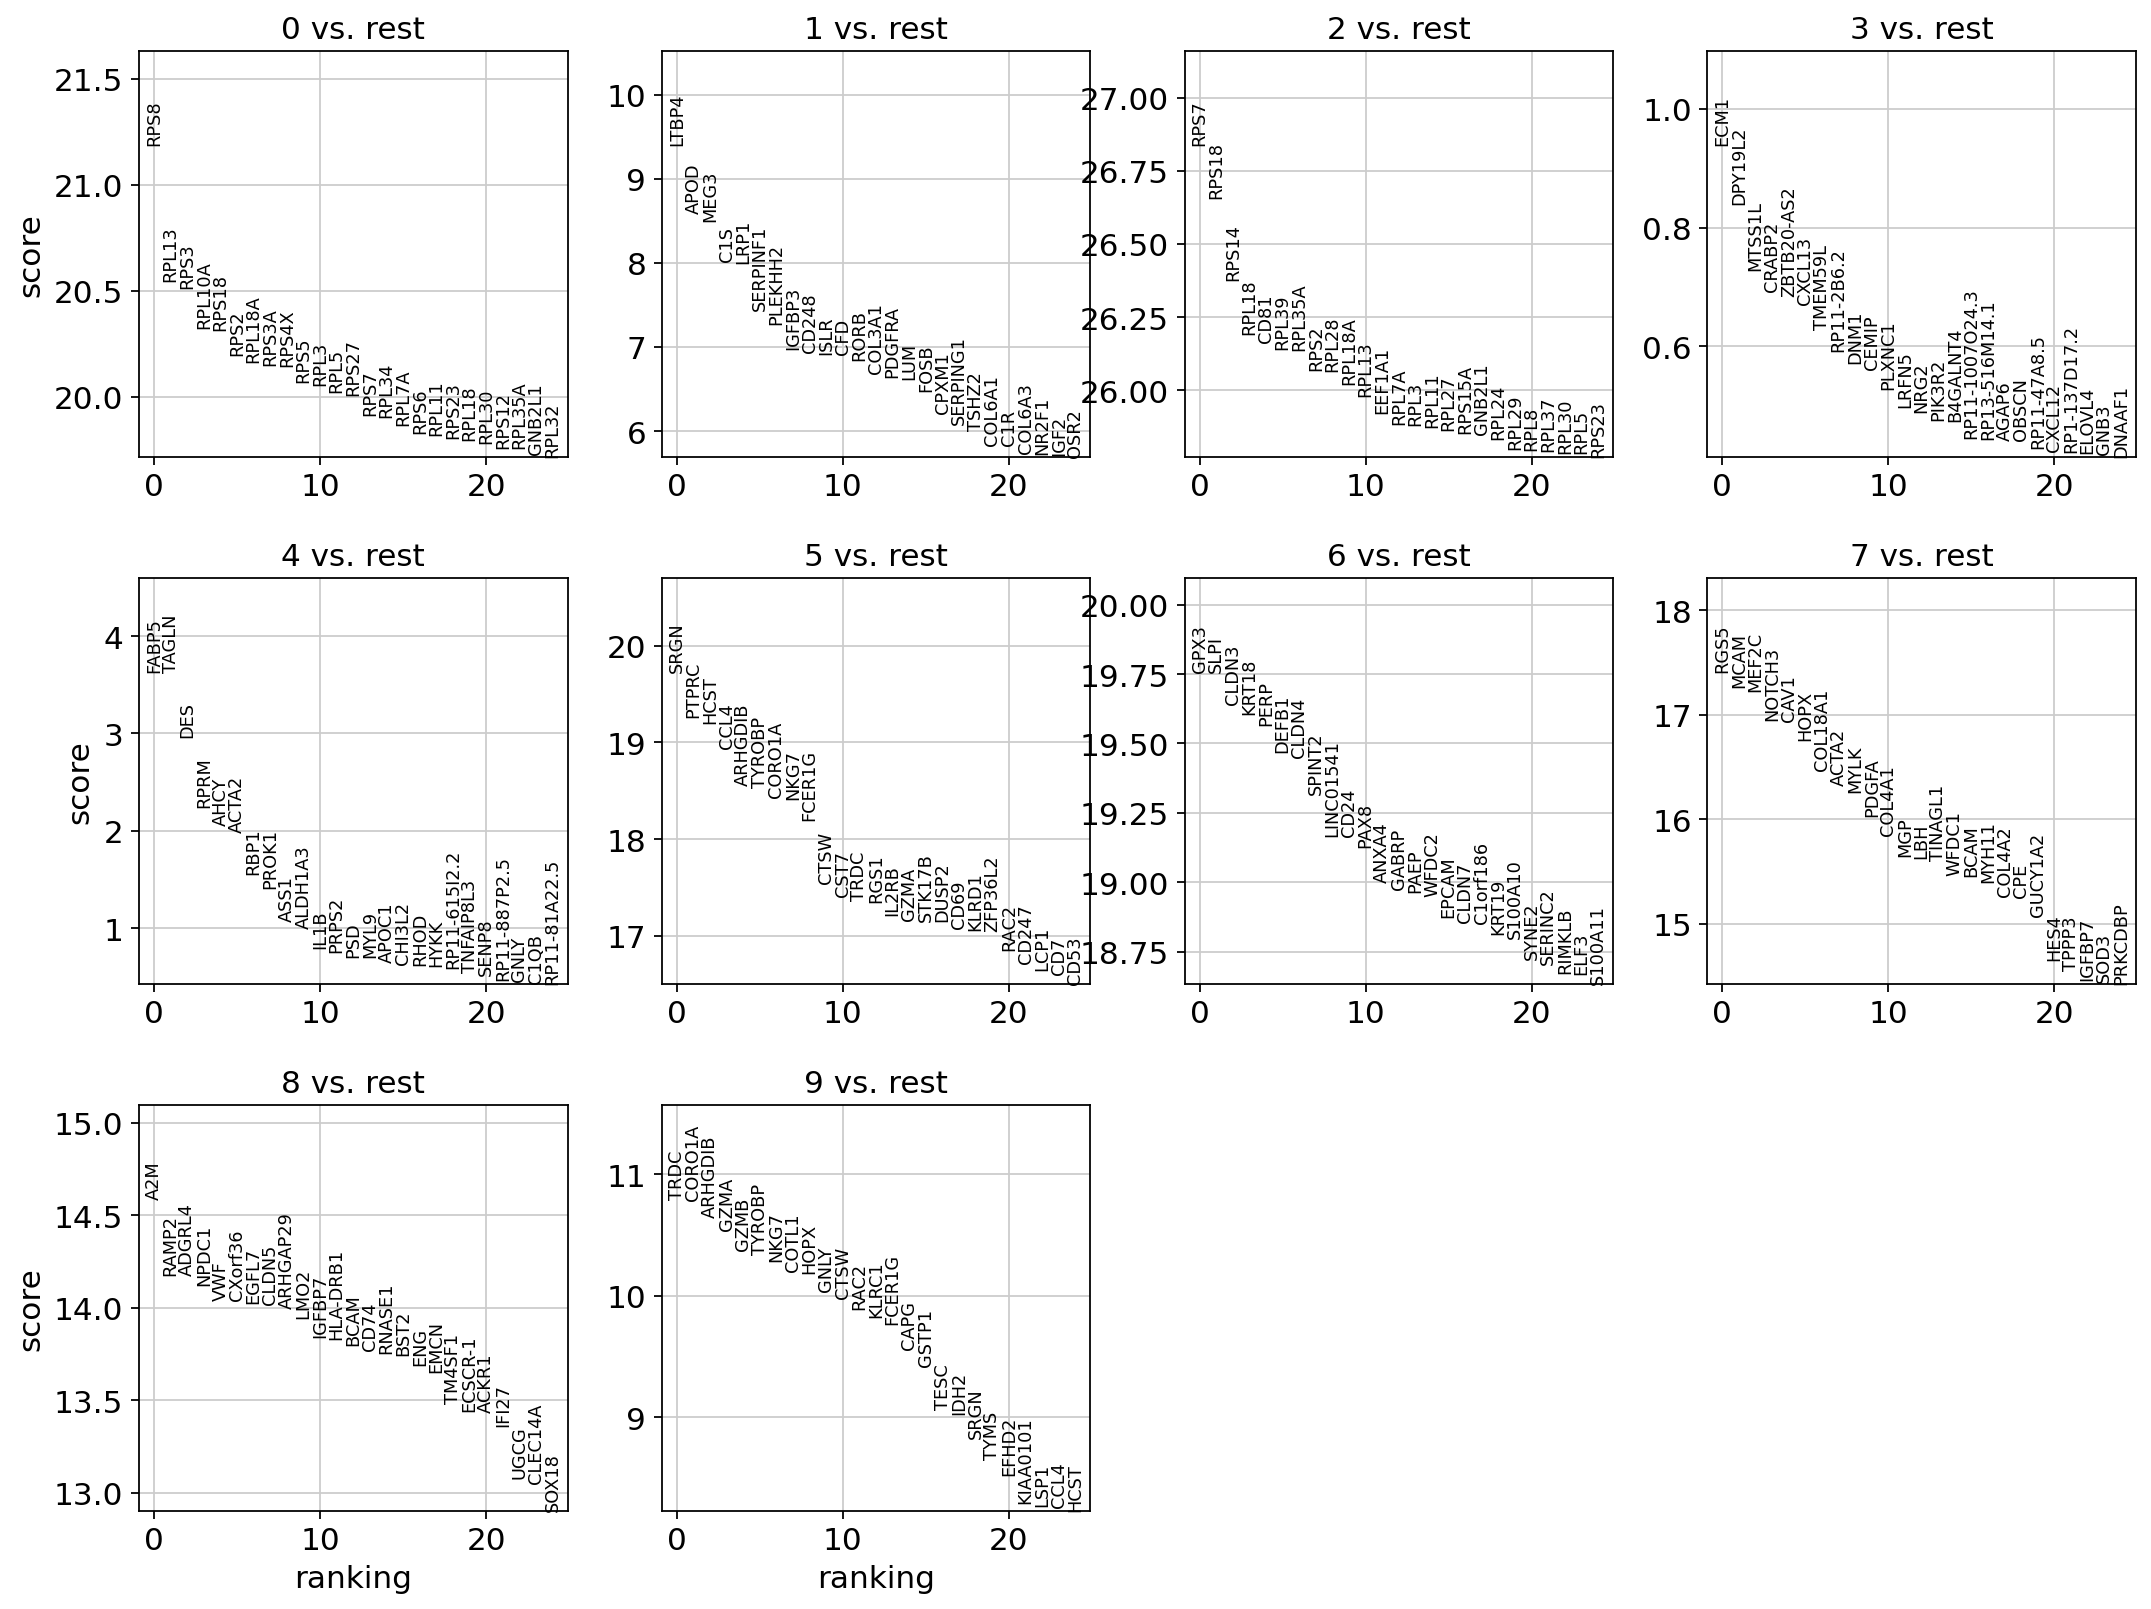

In [23]:
sc.pp.log1p(adata_secPhase_s2)

#result of a Wilcoxon rank-sum test:
sc.tl.rank_genes_groups(adata_secPhase_s2, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_secPhase_s2, n_genes=25, sharey=False) #ln36

In [24]:
pd.DataFrame(adata_secPhase_s2.uns['rank_genes_groups']['names']).head(5)

,0,1,2,3,4,5,6,7,8,9
0,RPS8,LTBP4,RPS7,ECM1,FABP5,SRGN,GPX3,RGS5,A2M,TRDC
1,RPL13,APOD,RPS18,DPY19L2,TAGLN,PTPRC,SLPI,MCAM,RAMP2,CORO1A
2,RPS3,MEG3,RPS14,MTSS1L,DES,HCST,CLDN3,MEF2C,ADGRL4,ARHGDIB
3,RPL10A,C1S,RPL18,CRABP2,RPRM,CCL4,KRT18,NOTCH3,NPDC1,GZMA
4,RPS18,LRP1,CD81,ZBTB20-AS2,AHCY,ARHGDIB,PERP,CAV1,VWF,GZMB
